In [34]:
pip install pandas scikit-learn matplotlib seaborn

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np
from google.colab import files

In [36]:
uploaded = files.upload()
df = pd.read_csv("heart.csv")  # Replace 'heart.csv' with your actual file name
print(df)

Saving heart.csv to heart (2).csv
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

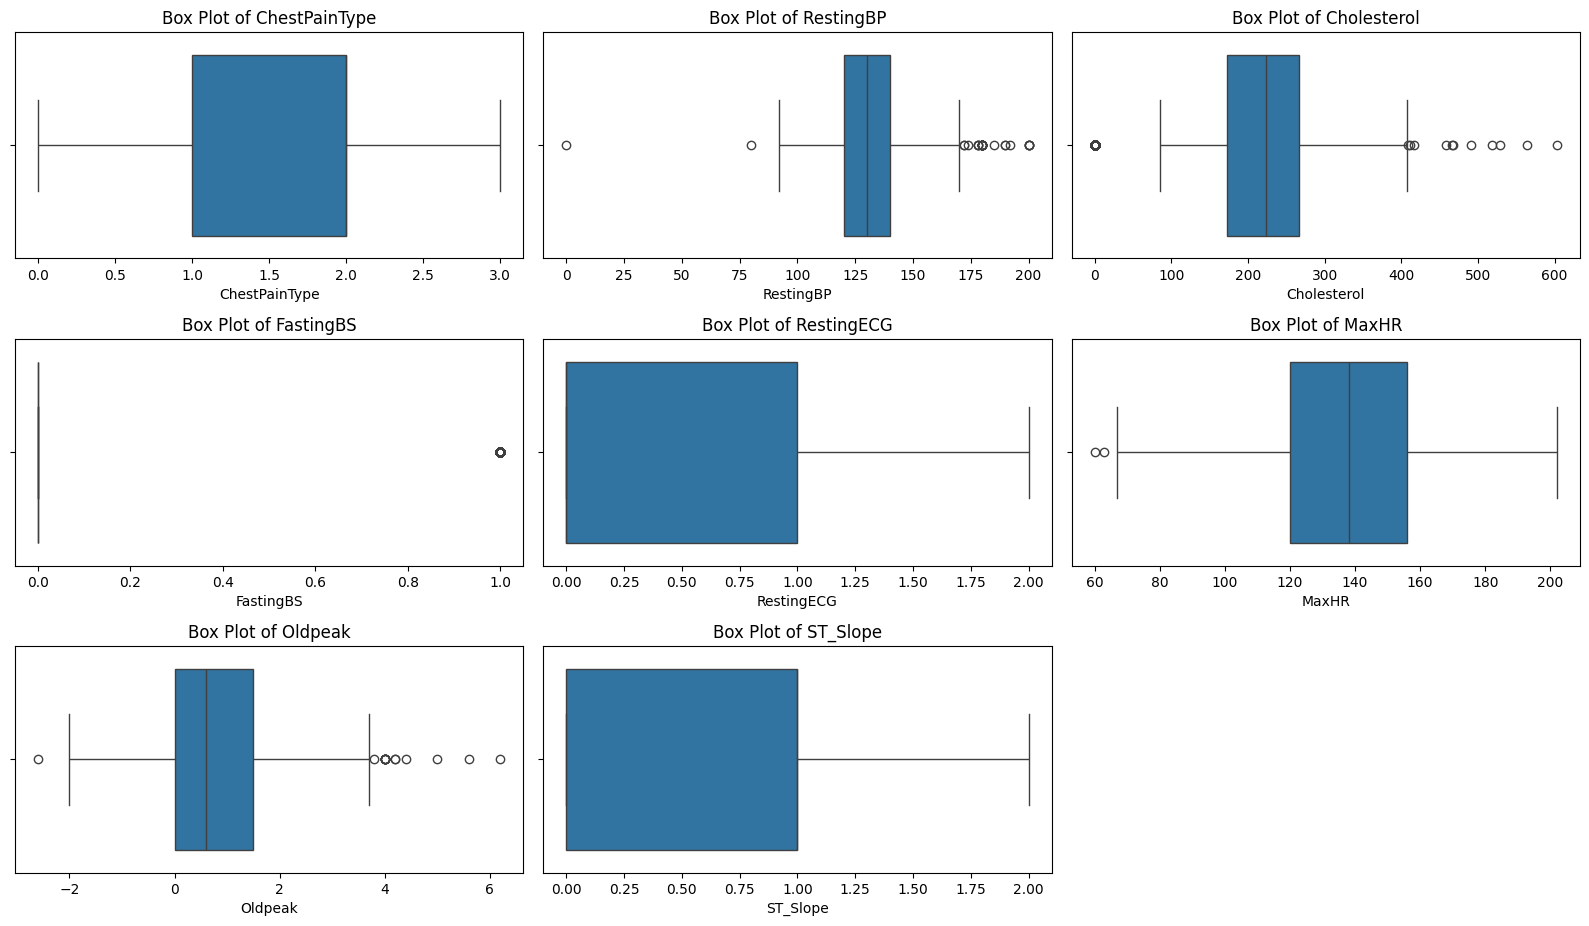

Outliers in ChestPainType:
Empty DataFrame
Columns: [ChestPainType]
Index: []


Outliers in RestingBP:
     RestingBP
109        190
123        180
189        180
190        180
241        200
274        180
275        180
278        180
314         80
365        200
372        185
399        200
411        180
423        180
449          0
475        178
550        172
585        180
592        190
673        174
702        178
725        180
732        200
759        192
774        178
780        180
855        180
880        172


Outliers in Cholesterol:
     Cholesterol
28           468
30           518
69           412
76           529
103          466
..           ...
535            0
536            0
616          564
667          417
796          409

[183 rows x 1 columns]


Outliers in FastingBS:
     FastingBS
36           1
38           1
52           1
84           1
86           1
..         ...
887          1
888          1
901          1
911          1
914          1

[

In [60]:
columns = [ 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
           'RestingECG', 'MaxHR', 'Oldpeak', 'ST_Slope']

# Create a box plot for each column
plt.figure(figsize=(16, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()

plt.show()


def identify_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers

# Identify outliers for each feature
outliers = identify_outliers(df, columns)

# Print the outliers for each column
for col, outlier_data in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_data[[col]])  # Print only the outlier values for the column
    print("\n")

df.isnull().sum()
print(df.dtypes)

sns.boxplot(x=df['Cholesterol'])

df.info() #to view all the data

df.describe()

df.Sex.replace({'F':0, 'M':1}, inplace =True)
df.ChestPainType.replace({'ATA':0, 'NAP':1, 'ASY':2, 'TA':3}, inplace =True)
df.RestingECG.replace({'Normal':0, 'ST':1, 'LVH':2}, inplace =True)
df.ExerciseAngina.replace({'N':0, 'Y':1}, inplace =True)
df.ST_Slope.replace({'Up':0, 'Flat':1, 'Down':2}, inplace =True)

df.head(10)


# Separate the target variable (HeartDisease) from the feature variables
X = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

# Standardize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Initialize PCA with 2 components (2D projection)
pca = PCA(n_components=2)


# Fit and transform the standardized data
X_pca = pca.fit_transform(X_scaled)
pca.get_covariance()

explained_variance=pca.explained_variance_ratio_
explained_variance
# Convert the result into a DataFrame for easy handling
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['HeartDisease'] = y  # Adding the target variable for visualization

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='HeartDisease', data=pca_df, palette='coolwarm', alpha=0.7)
plt.title('2D PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease', loc='best')
plt.show()


# Print the explained variance ratio of the components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


# Plot cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Cumulative Explained Variance by PCA')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

